In [1]:
%pylab nbagg
%matplotlib notebook
#from scipy.optimize import *
import cma, como
import numpy as np

import pylab as pl
import matplotlib.pyplot as plt
import copy

import math

Populating the interactive namespace from numpy and matplotlib


In [2]:
dimension = 10  # dimension of the search space
num_kernels = 11 # number of single-objective solvers (number of points on the front)

### Settings for the sphere problem

In [7]:
sigma0 = 0.2    # initial step-sizes
cma_opts = {'tolx': 10**-3}
#inopts = {'verb_disp': 500, 'archive': True, 'restart': como.best_chv_restart_kernel, 'update_order': None} 
inopts = {'verb_disp': 500, 'archive': True, 'update_order': None} 
refpoint = [1.1, 1.1]

In [8]:
fitness = como.FitFun(lambda x: 1 / len(x) * cma.ff.sphere(x), lambda x: 1 / len(x) * cma.ff.sphere(x-1)) # a callable bi-objective function

### Settings for the Frederic's rastrigin problem

In [13]:
sigma0 = 5    # initial step-sizes
cma_opts = {'tolx': 10**-3, 'popsize': 32}
inopts = {'verb_disp': 500, 'archive': True, 'restart': como.random_restart_kernel, 'update_order': None} 

In [14]:
fun1 = lambda x: sum(np.abs(x)**0.8 + 5 * np.sin(x**3))
fun2 = lambda x: (10. * len(x) + sum( x**2 -10. * np.cos(2. * np.pi * x)))/5 #rastrigin
fitness = como.FitFun(fun1, fun2)
refpoint = [5, 70]

### Instantiation of the MO optimizer

In [9]:
list_of_solvers = como.get_cmas(num_kernels * [dimension * [0]], sigma0, cma_opts) # produce `num_kernels cma instances`
moes = como.Sofomore(list_of_solvers, opts=inopts, reference_point=refpoint) # create a como-cma-es instance

<IPython.core.display.Javascript object>


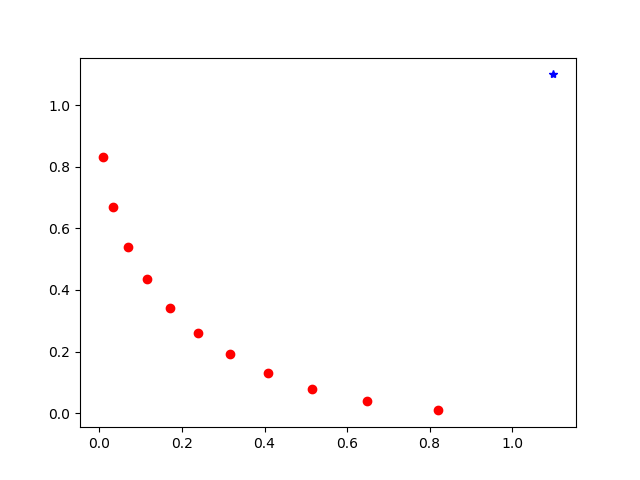

Iterat #Fevals   Hypervolume   axis ratios   sigmas   min&max stds
                                  (median)  (median)    (median)
    1     10 1.100000000000001e-01 1.0e+00 2.00e-01  2e-01  2e-01
    2     20 2.063668056365134e-01 1.0e+00 2.00e-01  2e-01  2e-01
    3     30 2.065921657531900e-01 1.0e+00 2.00e-01  2e-01  2e-01
  500   5000 1.010344235280678e+00 1.9e+00 3.70e-02  2e-02  3e-02
 1000  10000 1.012123541745012e+00 2.0e+00 4.87e-03  2e-03  3e-03


KeyboardInterrupt: 

In [10]:
#Animation of COMO with 2 objectives 

fig = plt.figure()
ax = fig.add_subplot(111)
#ax = fig.add_axes([0,0,1,1])

pl.ion()
fig.show()
fig.canvas.draw()

while not moes.stop():
    #making a step on the COMO algorithm
    moes.optimize(fitness, iterations = 1)

    ax.clear()

    tab = [kernel.objective_values for kernel in moes.kernels if kernel.objective_values is not None]
    f0 = [vec[0] for vec in tab]
    f1 = [vec[1] for vec in tab]

    ax.plot(f0,f1,'ro')
    ax.plot([moes.reference_point[0]], [moes.reference_point[1]], 'b*')
    
    fig.canvas.draw()
    
   # myaxes = plt.gca()
   # myaxes.set_aspect('equal')
   # pl.savefig('./convfig/convergence{}.png'.format(iteration))